![](https://snag.gy/h9Xwf1.jpg)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas`

_Authors: Dave Yerrington (SF)_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.
- Practice plotting with pandas.

### Lesson Guide

- [Introduction to `pandas`](#introduction)
- [Loading csv Files](#loading_csvs)
- [Exploring Your Data](#exploring_data)
- [Data Dimensions](#data_dimensions)
- [DataFrames vs. Series](#dataframe_series)
- [Using the `.info()` Function](#info)
- [Using the `.describe()` Function](#describe)
- [Independent Practice](#independent_practice)
- [Pandas Indexing](#indexing)
- [Creating DataFrames](#creating_dataframes)
- [Checking Data Types](#dtypes)
- [Renaming and Assignment](#renaming_assignment)
- [Basic `pandas` Plotting](#basic_plotting)
- [Logical Filtering](#filtering)
- [Review](#review)

### A note on different Pandas versions.

It's important to realize there are some differences between Pandas versions.  If you are using the version of the Pandas package that is packged with the Docker container we are using, this notebook should work properly.  However, you should expect some differences here and there and be able to adapt by referencing any minor differences in documentation if you choose to use a different version of Pandas.

Currently, this notebook is tested in v0.19.2

> The cell below can be run to see which version you are using currently.

In [1]:
import pandas as pd

pd.__version__

'0.19.2'

<a id='introduction'></a>

### What is `pandas`?

---

- Data analysis library - **P**anel **D**ata **S**ystem.
- Created by Wes McKinney and Open Sourced by AQR Capital Management, LLC 2009.
- Implemented in highly optimized Python/Cython.
- Most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.


### Pandas Use Cases

---

- Cleaning data / Munging
- Exploratory Analysis
- Structuring data for plots or tabular display
- Joining disparate sources
- Modeling
- Filtering, extracting, or transforming 


### Discussion:  What do you think are some challenges when accessing data?

Follow up:  Do you really feel it's right that data scientists typically have to clean so much data?

![](https://snag.gy/tpiLCH.jpg)

![](https://snag.gy/1V0Ol4.jpg)

### Common Outputs

---

- Export to Databases
- Integrated with `matplotlib`
- Collaborate in common formats (plus a variety of others)
- Integration with Python built-ins (**and `numpy`!**)


### Importing `pandas`

---

Import pandas at the top of your notebook like so:

In [2]:
import pandas as pd

Recall that the **`import pandas as pd`** syntax nicknames the `pandas` module as **`pd`** for convenience.

<a id='loading_csvs'></a>

### Loading a csv into a DataFrame

---

Pandas can load many types of files, but one of the most common filetypes for storing data is in a ```.csv``` file. Let's load a dataset on drug use by age from the ```./datasets``` directory:

In [3]:
drug = pd.read_csv('./datasets/drug-use-by-age.csv')

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will barely scratch the surface of DataFrame functionality in this lesson, but over the course of this class you will become an expert at using them.

<a id='exploring_data'></a>

### Exploring data using DataFrames

---

DataFrames come with built-in functionality that makes data exploration easy. 

Let's start by looking at the "header" of your data with the ```.head()``` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

In [4]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

In [5]:
drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


<a id='data_dimensions'></a>

### Data dimensions

---

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

In [6]:
drug.shape

(17, 28)

You can see we have 17 rows and 28 columns. This is obviously a small dataset.

You will notice that this is operates the same as `.shape` for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed.

Look at the names of your columns with the ```.columns``` property.

[Note: You will see the columns having the **u'string'** and can most of the time safely ignore this as the column names are typically loaded in as ascii and not unicode]

In [7]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

Accessing a specific column is easy. You can use the bracket syntax just like python dictionaries with the string name of the column to extract that column.

In [8]:
drug['crack-use'].head()

0    0.0
1    0.0
2    0.0
3    0.1
4    0.0
Name: crack-use, dtype: float64

As you can see we can also use the ```.head()``` function on a single column, which is represented as a pandas Series object.

You can also access a column (as a DataFrame instead of a Series) or multiple columns with a list of strings.

In [9]:
drug[['crack-use']].head()

,crack-use
0,0.0
1,0.0
2,0.0
3,0.1
4,0.0


In [10]:
drug[['age', 'crack-use']].head()

,age,crack-use
0,12,0.0
1,13,0.0
2,14,0.0
3,15,0.1
4,16,0.0


In [11]:
drug['age'].value_counts()

17       1
22-23    1
24-25    1
65+      1
30-34    1
16       1
19       1
15       1
12       1
20       1
13       1
50-64    1
35-49    1
14       1
18       1
26-29    1
21       1
Name: age, dtype: int64

<a id='dataframe_series'></a>

### DataFrame vs. Series

---

There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [12]:
# drug[['age']]

In [13]:
print(type(drug['age']))

print(type(drug[['age']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


What is the difference between a pandas Series and DataFrame object?

Essentially, a **Series** object contains the data for a single column of your data, and the **DataFrame** is a matrix-like container for those Series objects that comprise your data.

As long as your column names have no spaces or other specialized characters in them (underscores are ok), you can access a column as a property of the dataframe.  

**Get in the habit of referencing your series columns using df['my_column'] rather than by object notation `df.my_column`**.  Because, there are many edge cases where the object notation does not work and there are nuances as to how Pandas will behave, **`df.my_column`** vs **`df['my_column']`**. 

In [14]:
drug['age'].head()

0    12
1    13
2    14
3    15
4    16
Name: age, dtype: object

Remember: this will be a **Series** object, not a DataFrame.

<a id='info'></a>

### Examining your data with `.info()`

---

The `.info()` should be the first thing you look at when getting acquainted with a new dataset.

**Types** are very important.  They impact the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and when you can encounter unexpected results.

> _Typical problems when working with new datasets_:
> - Missing values
> - Unexpected types (string/object instead of int/float)
> - Dirty data (commas, dollar signs, unexpected characters, etc)
> - Blank values that are actually "non-null" or single white-space characters

`.info()` is a function that is available on every **DataFrame** object. It gives you information about:

- Name of column / variable attribute
- Type of index (RangeIndex is default)
- Count of non-null values by column / attribute
- Type of data contained in column / attribute
- Unqiue counts of dtypes (Pandas data types)
- Memory usage of our dataset


In [15]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### Caveat:  Working with Larger Datasets 

---

If you have a dataset that is larger than your given memory, there are better solutions for working with your data.

![](https://snag.gy/UGNamo.jpg)

Generally:

- Consider storing your data in a relational database.
- Use HDF5 (PyTables) if you need to operate on all of the data.
- Take a sample of your larger dataset, approximating the total data, before importing or downloading.
- Consider distributed computing environment like Hadoop, Starcluster, or Spark (there are even more options and considerations for this but we will cover them in the future!).


<a id='describe'></a>

### Summarizing data with `.describe()`

---

The ```.describe()``` function is very useful for taking a quick look at your data. It gives you some of the basic descriptive statistics.

Use the ```.describe()``` function on just the ```crack-use``` column.

In [16]:
drug['crack-use'].describe()

count    17.000000
mean      0.294118
std       0.235772
min       0.000000
25%       0.000000
50%       0.400000
75%       0.500000
max       0.600000
Name: crack-use, dtype: float64

You can use it on multiple columns, such as ```crack-use``` and ```alcohol-frequency```.

In [17]:
drug[['crack-use','alcohol-frequency']].describe().T

,count,mean,std,min,25%,50%,75%,max
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0


```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values 
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

<img src="https://snag.gy/AH6E8I.jpg">

There are built-in math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the ```.mean()``` function on the ```drug``` DataFrame to get the mean for every column.

In [18]:
drug['meth-use']

0     0.0
1     0.1
2     0.1
3     0.3
4     0.3
5     0.6
6     0.5
7     0.4
8     0.9
9     0.6
10    0.6
11    0.7
12    0.6
13    0.4
14    0.2
15    0.2
16    0.0
Name: meth-use, dtype: float64

<a id='independent_practice'></a>

### Independent Practice

---

Now that we know a little bit about basic DataFrame use, let's practice on a new dataset.

> Pro tip:  You can use the "tab" key to browse filesystem resources when your cursor is in a string to get a relative reference to the files that can be loaded in Jupyter notebook.  Remember, you have to use your arrow keys to navigate the files populated in the UI. 

<img src="https://snag.gy/IlLNm9.jpg">

1. Find and load the "diamonds" dataset into a DataFrame (in the datasets directory).
1. Print out the columns.
1. What does the dataset look like in terms of dimensions?
1. Check the types of each column.
  1. What is the most common type?
  1. How many entries are there?
  1. How much memory does this dataset consume?
1. Examine the summary statistics of the dataset.

In [52]:
csv_file = "update this"
diamonds = pd.read_csv(csv_file)

### Finish the practice here.

### More on Series

There are many operations we can perform on our DataFrames.  Before we step too far into the world of complex transformatoins, it's important to note the two main aspects of how **series** data can be accessed within a _DataFrame_.

### Axis = 1: Columns

So far we know we can select one, or many column series within brackets `df[series references here]`.  This selector works with columns which are a series.  We can access the columns axis by _column name_, or _numeric index_.

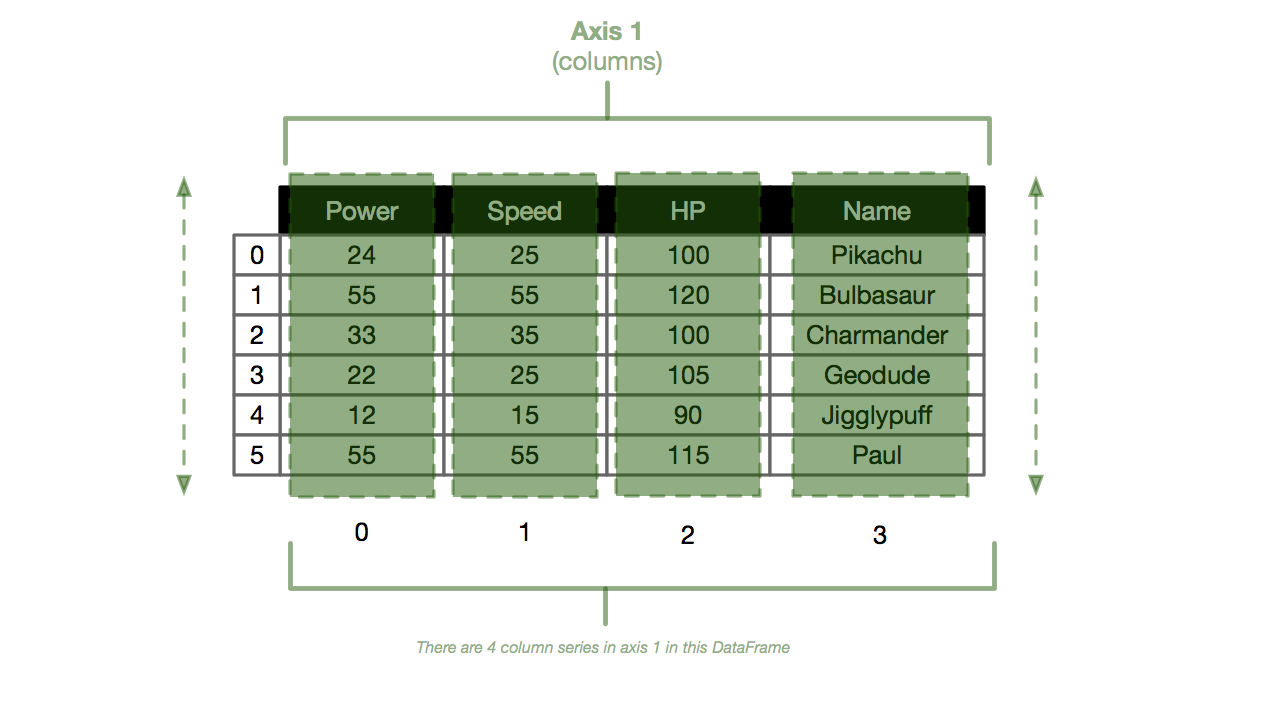

### Axis = 0:  Rows

There are times we might want to access our data by the row element.  As we get into cleaning data and transforming it for the various applications we will be using, this is also another aspect of accessing our _DataFrames_ that we will need to be familliar with.  We can access the rows axis by literal index value (even if it's a string), or by numeric index.  More on this in the near future.

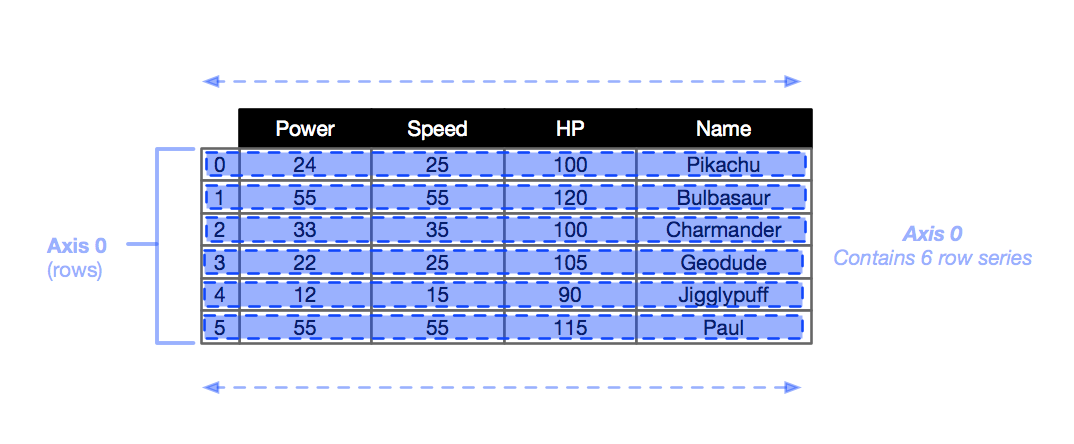

<a id='indexing'></a>

### Pandas Indexing 

---

More often than not, we want to operate on or extract specific portions of our data. When we perform indexing on a DataFrame or Series we can specifying the specific section of the data.

Pandas has three properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> In the latest version of Pandas `.ix` is now deprecated for those who are familliar with it. **`.ix`** indexes with _both labels and integer positions_.

To help clarify these differences, lets first re-set the row labels to letters using the ```.set_index()``` function:

In [20]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [21]:
new_index_values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
drug.index = new_index_values

In [22]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
A,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
B,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
C,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
D,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


Using the **`.loc`** indexer, we can pull out the rows **B thru F** and the columns **marijuana-use and marijuana-frequency**.

In [23]:
subset = drug.loc[['B','C','D','E','F'], ['marijuana-use','marijuana-frequency']]

In [24]:
subset

,marijuana-use,marijuana-frequency
B,3.4,15.0
C,8.7,24.0
D,14.5,25.0
E,22.5,30.0
F,28.0,36.0


We can do the same thing with the **`.iloc`** indexer, but we have to use integers for the location.

In [25]:
subset = drug.iloc[[1,2,3,4,5], [4,5]]

In [26]:
subset

,marijuana-use,marijuana-frequency
B,3.4,15.0
C,8.7,24.0
D,14.5,25.0
E,22.5,30.0
F,28.0,36.0


If we you index the rows or columns with integers using **`.loc`**, you will get an error.

### How can we reference the variables "age" and "crack-use", but only rows "C" and "F"?

<a id='creating_dataframes'></a>

### Creating DataFrames

---

The simplest way to create your own dataframe when not importing from a file is to give the ```pd.DataFrame()``` instantiator a dictionary.

In [27]:
mydata = pd.DataFrame({
    'Letters':  ['A','B','C'], 
    'Integers': [1,2,3], 
    'Floats':   [2.2, 3.3, 4.4]
})

In [28]:
mydata

,Floats,Integers,Letters
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


As you might expect, the dictionary needs to have lists of values that are all the same length. The keys correspond to the names of the columns and the values correspond to the data in the columns.

<a id='dtypes'></a>

### Examining data types

---

Pandas comes with a useful property to look at just the data types of your DataFrame columns. Use ```.dtypes``` on your DataFrame:

In [29]:
mydata.dtypes

Floats      float64
Integers      int64
Letters      object
dtype: object

This will show you what data type each column is. Strings are stored as a type called "object" because they are not guaranteed to take up a set amount of space (strings can be of any length).

### Can you think of any reasons why you might want to check your dtypes?

<a id='renaming_assignment'></a>

### Renaming and Assignment

---

Pandas makes it easy to change column names and assign values to your DataFrame.

Say we wanted to change the column name "Integers" to "int":

In [30]:
mydata.columns[1]

'Integers'

In [31]:
mydata.rename(columns={mydata.columns[1]:'int'}, inplace=True) # inplace = True updates mydata
print(mydata.columns)

Index(['Floats', 'int', 'Letters'], dtype='object')


In [32]:
mydata

,Floats,int,Letters
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


If you wanted to change every column name, you could just assign a new list to the ```.columns``` property.

In [33]:
mydata.columns = ['A','B','C']
mydata.head()

,A,B,C
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


In [34]:
drug.iloc[:, 0:3].head()

,age,n,alcohol-use
A,12,2798,3.9
B,13,2757,8.5
C,14,2792,18.1
D,15,2956,29.2
E,16,3058,40.1


In [35]:
drug[drug.columns[0:3]].head()

,age,n,alcohol-use
A,12,2798,3.9
B,13,2757,8.5
C,14,2792,18.1
D,15,2956,29.2
E,16,3058,40.1


We can assign values using the indexing that we learned before.

Let's change the newly renamed "B" column at row index 1 to be 100.

In [36]:
mydata.loc[1, 'B'] = 100
mydata.head()

,A,B,C
0,2.2,1,A
1,3.3,100,B
2,4.4,3,C


Alternatively we can assign multiple values at once with lists.

In [37]:
# mydata.loc[:, 'A'] = [0,0,0]
# print(mydata)

mydata.loc[0, ['B','C']] = [-1000, 'newstring']
print(mydata.head())

     A     B          C
0  2.2 -1000  newstring
1  3.3   100          B
2  4.4     3          C


<a id='basic_plotting'></a>

### Basic plotting using DataFrames

---

DataFrames also come with some basic convenience functions for plotting data. First import matplotlib and set it to run "inline" in your notebook.

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

Using our ```drug``` DataFrame again, use the ```.plot()``` function to plot the **age** columns against the **marijuana-use** column.

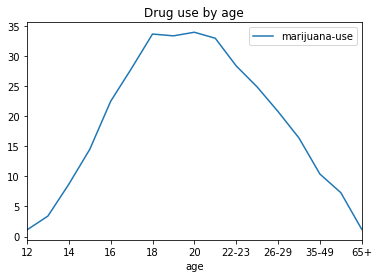

In [39]:
drug.plot(x='age', y='marijuana-use', title="Drug use by age")

The ```.hist()``` function will create a histogram for a column's values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11428a0f0>]], dtype=object)

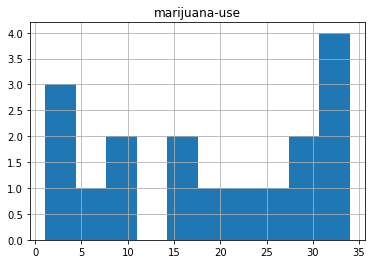

In [40]:
drug.hist('marijuana-use')

### Sidenote about using Pandas plotting features

It's very handy to be able to plot multiple figures within a single figure.  Since Pandas uses Matplotlib under the hood, it's very useful to combine these tools to get the most out of your plots.

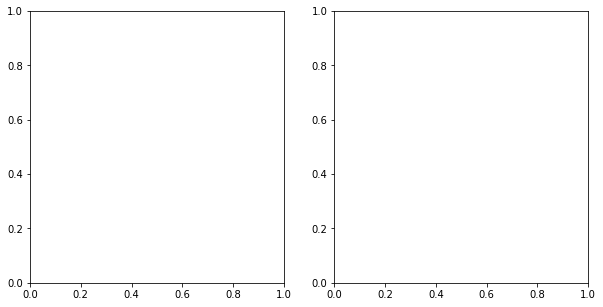

In [41]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

Accessing our individual sub-figure plots can be done via `ax[index]` that we defined earlier.

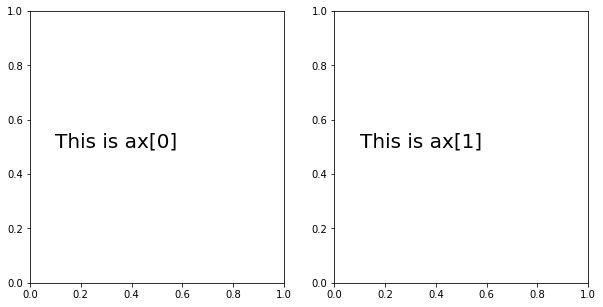

In [42]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].text(s="This is ax[0]", x=.1, y=.5, size=20)
ax[1].text(s="This is ax[1]", x=.1, y=.5, size=20)


### Adding our Pandas plots using `ax`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116944780>], dtype=object)

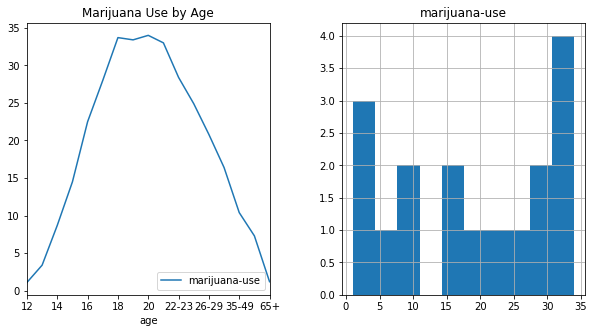

In [43]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

drug.plot(title="Marijuana Use by Age", x='age', y='marijuana-use', ax=ax[0])
drug.hist('marijuana-use', ax=ax[1])


### More than one row

`ax[row, column]`

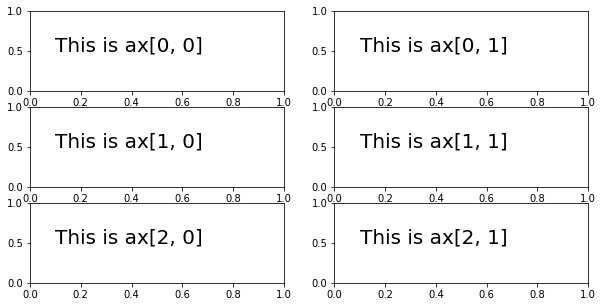

In [44]:
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

ax[0, 0].text(s="This is ax[0, 0]", x=.1, y=.5, size=20)
ax[0, 1].text(s="This is ax[0, 1]", x=.1, y=.5, size=20)
ax[1, 0].text(s="This is ax[1, 0]", x=.1, y=.5, size=20)
ax[1, 1].text(s="This is ax[1, 1]", x=.1, y=.5, size=20)
ax[2, 0].text(s="This is ax[2, 0]", x=.1, y=.5, size=20)
ax[2, 1].text(s="This is ax[2, 1]", x=.1, y=.5, size=20)

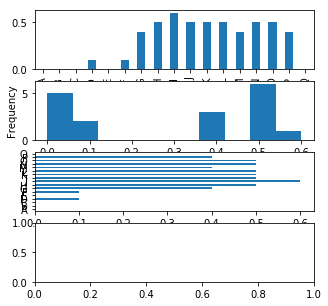

In [45]:
figure, ax = plt.subplots(nrows=4, ncols=1, figsize=(5, 5))

drug['crack-use'].plot(kind="bar", ax=ax[0])
drug['crack-use'].plot(kind="hist", ax=ax[1])
drug['crack-use'].plot(kind="barh", ax=ax[2])

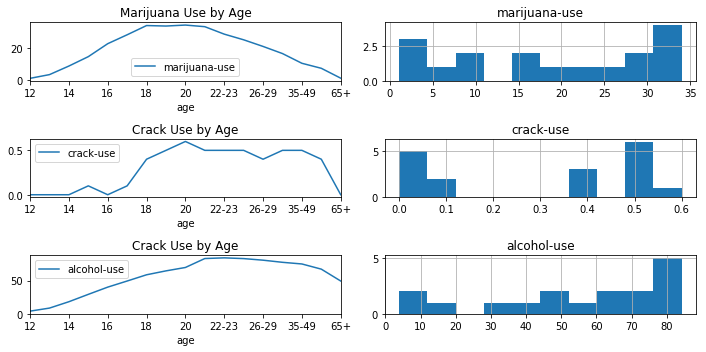

In [46]:
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

# marijuana
drug.plot(title="Marijuana Use by Age", x='age', y='marijuana-use', ax=ax[0, 0])
drug.hist('marijuana-use', ax=ax[0, 1])

# crack
drug.plot(title="Crack Use by Age", x='age', y='crack-use', ax=ax[1, 0])
drug.hist('crack-use', ax=ax[1, 1])

# crack
drug.plot(title="Crack Use by Age", x='age', y='alcohol-use', ax=ax[2, 0])
drug.hist('alcohol-use', ax=ax[2, 1])

figure.tight_layout() ## this will pad your figures slightly


<a id='filtering'></a>

### Filtering Logic

---

One of the most powerful features of DataFrames is using logical commands to filter data.

Subset the ```drug``` data for only the rows where marijuana-use is greater than 20.

In [47]:
drug[drug['marijuana-use'] > 20]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
F,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
G,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
H,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
I,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
J,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
K,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
L,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
M,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


The ampersand sign can be used to subset where multiple conditions need to be met for each row. 

Subset the data for marijuana use over 20, as before, but now also where the n is greater than 4000.

In [48]:
drug[(drug['marijuana-use'] > 20) & (drug.n > 4000)]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
K,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
L,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5


In [49]:
mask = drug['marijuana-use'] > 20
drug[mask]


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
F,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
G,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
H,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
I,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
J,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
K,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
L,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
M,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


In [50]:
drug.sort_values(["alcohol-use", "crack-use"], ascending=[False, True])

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
K,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
J,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
L,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
M,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
N,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
O,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
I,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
P,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
H,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
G,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0


In [51]:
drug['alcohol-use'].sort_values(ascending=False)

K    84.2
J    83.2
L    83.1
M    80.7
N    77.5
O    75.0
I    69.7
P    67.2
H    64.6
G    58.7
F    49.3
Q    49.3
E    40.1
D    29.2
C    18.1
B     8.5
A     3.9
Name: alcohol-use, dtype: float64

<a id='review'></a>

### Review

---

 - What would we do with a dataset when we first acquire it?
 - What's important to consider when first looking at a dataset? 
 - What are some common problems we can run into with new data?
 - What are some common operations with DataFrames?
 - How do we slice? Index? Filter?